# Datavisualizations of sequences

In [1]:
# %matplotlib ipympl
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

import sys,os
sys.path.insert(0, '../src')
from config import *


In [2]:
df_seq = pd.read_csv(os.path.join(ROOT_PATH,DATA_DIR,"sequence_length_dataset.csv"))

In [3]:
df_seq

,idx,path,n_frames,sign,participant_id
0,0,train_landmark_files/26734/1000035562.parquet,23,blow,26734
1,1,train_landmark_files/28656/1000106739.parquet,11,wait,28656
2,2,train_landmark_files/16069/100015657.parquet,105,cloud,16069
3,3,train_landmark_files/25571/1000210073.parquet,12,bird,25571
4,4,train_landmark_files/62590/1000240708.parquet,18,owie,62590
...,...,...,...,...,...
94472,94472,train_landmark_files/53618/999786174.parquet,49,white,53618
94473,94473,train_landmark_files/26734/999799849.parquet,6,have,26734
94474,94474,train_landmark_files/25571/999833418.parquet,37,flower,25571
94475,94475,train_landmark_files/29302/999895257.parquet,34,room,29302


# Distributions of Number of frames per sign

In [4]:
df_countFrames = df_seq.groupby(by="sign").agg(dict({"n_frames":["mean","std"]}))
html = df_countFrames.to_html()

In [5]:
from IPython.display import display, HTML
display(HTML(df_countFrames.to_html()))

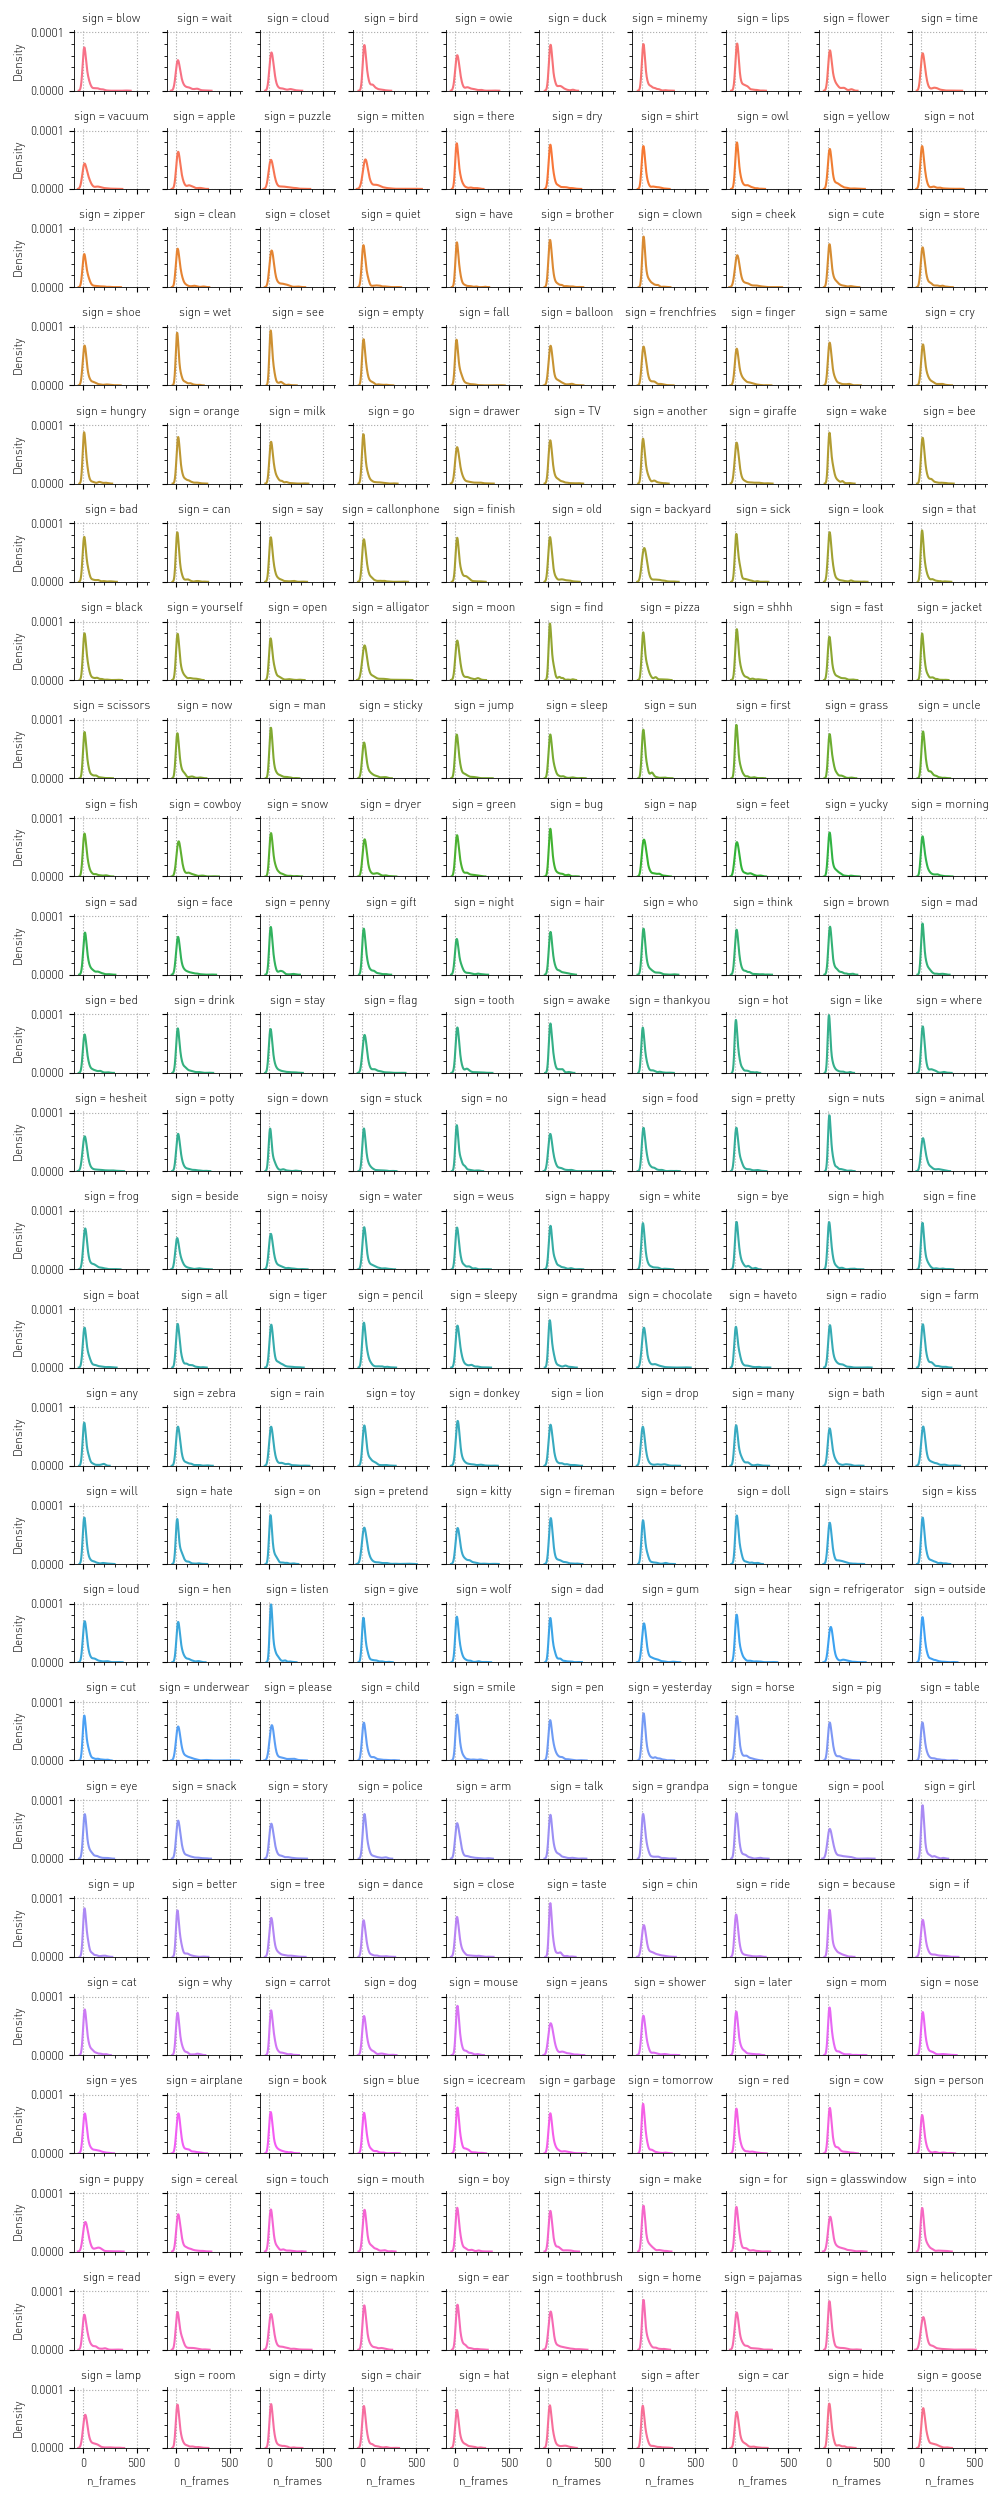

In [9]:
sns.displot(x = "n_frames",data = df_seq ,col = "sign",col_wrap=10,hue = "sign",height = 1,aspect = 1,legend = False,kind = "kde")

# Cumuluative distribution of #Frames

(0.8, 1.0)

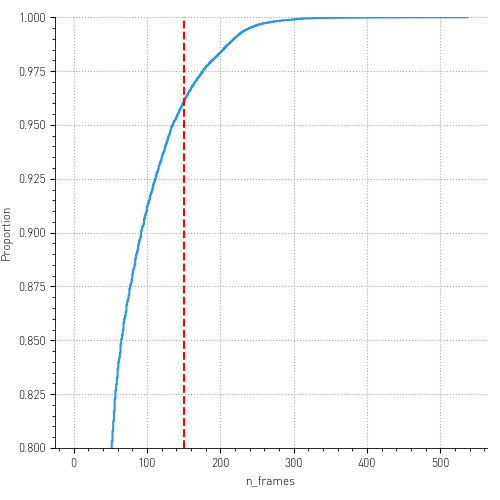

In [7]:
g = sns.displot(data = df_seq.n_frames,kind="ecdf")
g.axes[0][0].axvline(150,linestyle = "--",color = "red")
g.axes[0][0].set_ylim(.8,1)

# Count participant_ids

Locator attempting to generate 1250 ticks ([-0.4, ..., 249.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1250 ticks ([-0.4, ..., 249.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1250 ticks ([-0.4, ..., 249.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1250 ticks ([-0.4, ..., 249.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1250 ticks ([-0.4, ..., 249.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1250 ticks ([-0.4, ..., 249.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1250 ticks ([-0.4, ..., 249.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1250 ticks ([-0.4, ..., 249.4]), which exceeds Locator.MAXTICKS (1000).


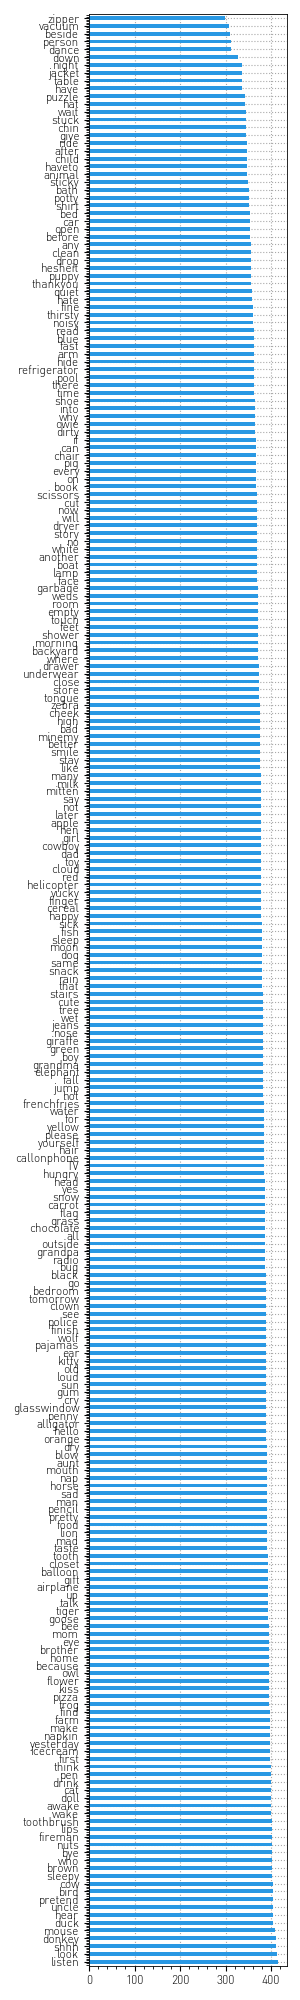

In [8]:
fig,ax = plt.subplots(1,figsize = (3,20))
df_seq.sign.value_counts().plot.barh()
plt.tight_layout()

In [8]:
df_summary = df_seq.groupby(by=["sign","participant_id"])["n_frames"].describe()


In [9]:
# from IPython.display import display, HTML

# display(HTML(df_summary.to_html()))